X.shape: (26, 2)


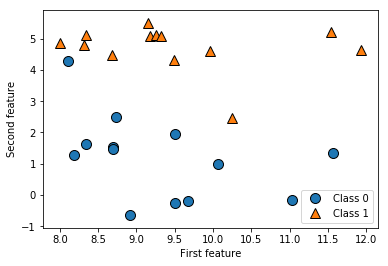

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

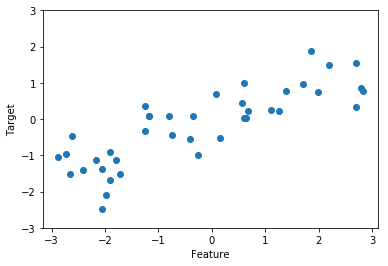

In [46]:
%matplotlib inline

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys(): \n{cancer.keys()}")

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [48]:
print(f"Shape of cancer data: {cancer.data.shape}")

Shape of cancer data: (569, 30)


In [49]:
print("Sample counts per class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [50]:
print(f"Feature names: \n{cancer.feature_names}")

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [51]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"Data shape: {boston.data.shape}")

Data shape: (506, 13)


In [52]:
X, y = mglearn.datasets.load_extended_boston()
print(f"X.shape: {X.shape}")

X.shape: (506, 104)


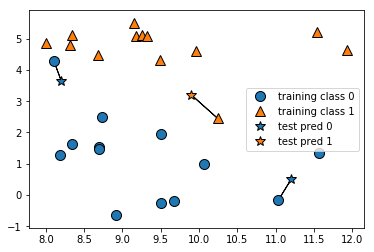

In [53]:
%matplotlib inline

mglearn.plots.plot_knn_classification(n_neighbors=1)

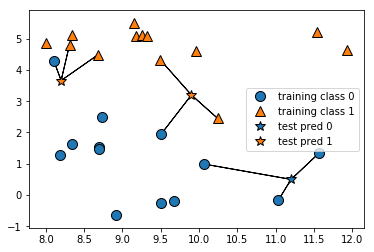

In [54]:
%matplotlib inline

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [55]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


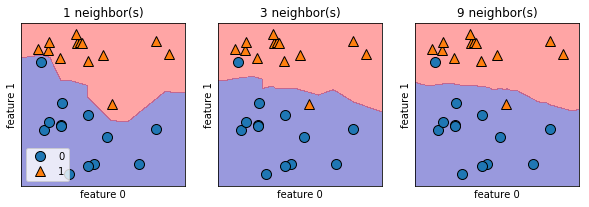

In [56]:
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

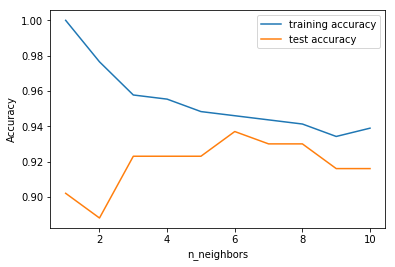

In [57]:
%matplotlib inline

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

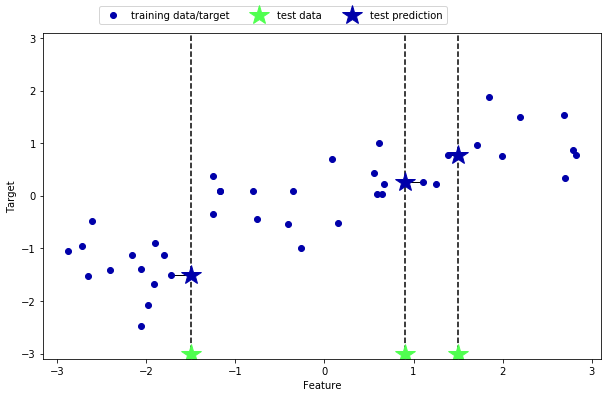

In [58]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

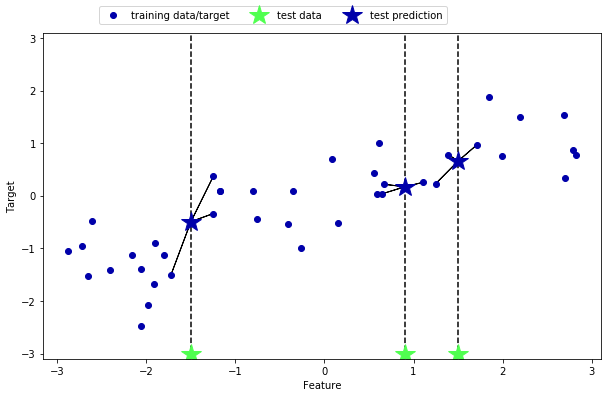

In [59]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [60]:
from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples=40)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(x_test)))
print("Test set R^2: {:.2f}".format(reg.score(x_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


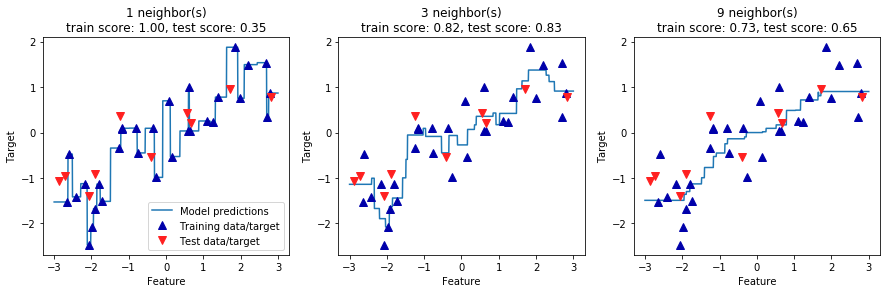

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\ntrain score: {:.2f}, test score: {:.2f}".format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

# 2.3.3 線形モデル
## 2.3.3.1 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


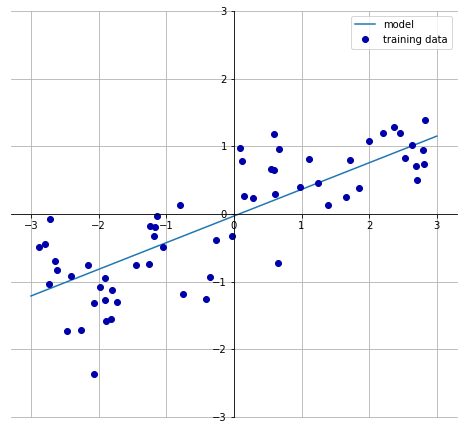

In [62]:
mglearn.plots.plot_linear_regression_wave()

## 2.3.3.2 線形回帰(通常最小二乗法)

In [63]:
from sklearn.linear_model import LinearRegression
x, y = mglearn.datasets.make_wave(n_samples=60)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression().fit(x_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [64]:
x, y = mglearn.datasets.load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lr = LinearRegression().fit(x_train, y_train)

print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

Training set score: 0.95
Test set score: 0.61


## 2.3.3.3 リッジ回帰


In [65]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [66]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(x_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [67]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(x_test, y_test)))

Training set score: 0.93
Test set score: 0.77


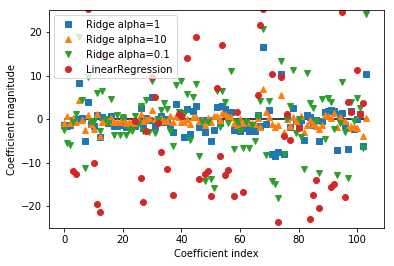

In [68]:
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

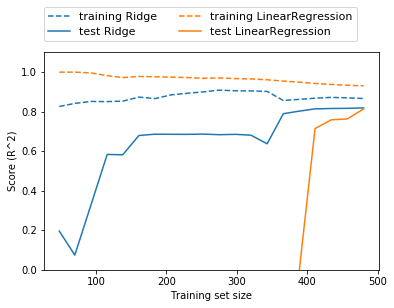

In [69]:
mglearn.plots.plot_ridge_n_samples()

## 2.3.3.4 Lasso

In [70]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [71]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [72]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


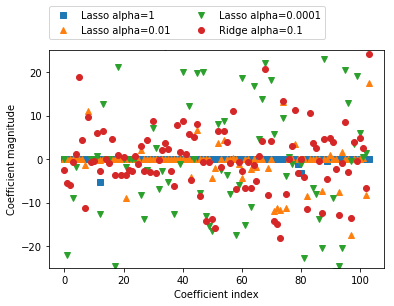

In [73]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

## 2.3.3.5 クラス分類のための線形モデル


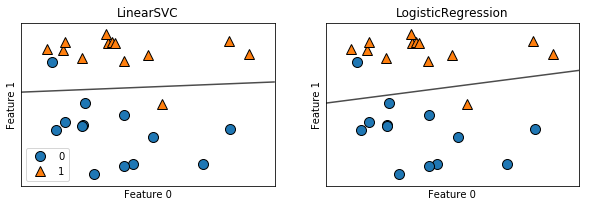

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

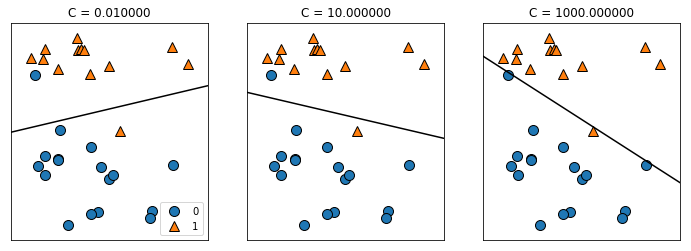

In [75]:
mglearn.plots.plot_linear_svc_regularization()

In [76]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [77]:
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(x_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [78]:
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(x_test, y_test)))

Training set score: 0.934
Test set score: 0.930


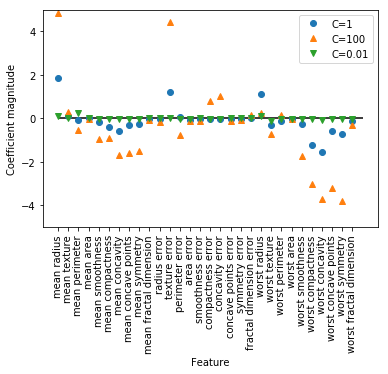

In [79]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


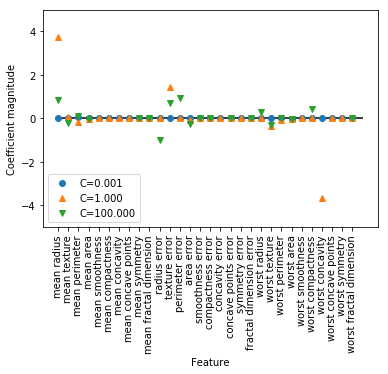

In [80]:
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(x_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(x_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)

## 2.3.3.6 線形モデルによる他クラス分類

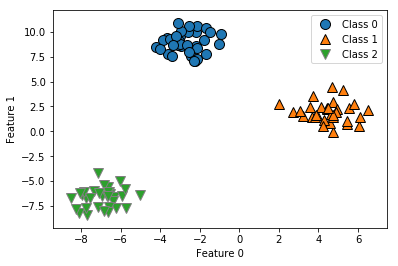

In [81]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [82]:
linear_svm = LinearSVC().fit(x, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


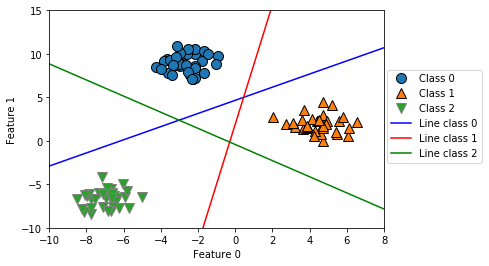

In [83]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

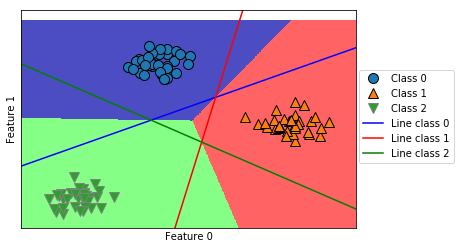

In [84]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

## 2.3.3.7 利点、欠点、パラメータ